In [61]:
import pandas as pd

df = pd.read_csv('Area.csv')
df_comp = df[df.countryEnglishName != 'China']
df_comp = df_comp.drop(['continentName','countryName','countryEnglishName','provinceName','provinceEnglishName','province_zipCode','cityName','cityEnglishName','city_zipCode','updateTime'],axis=1)
df_comp = df_comp.groupby(['continentEnglishName']).sum()
df_comp

,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
continentEnglishName,,,,,,,,
Africa,14330959,0.0,4351235,513493,0.0,0.0,0.0,0.0
Asia,154702532,529.0,65403322,4803035,2.0,0.0,0.0,0.0
Europe,430487857,0.0,140236994,36811009,0.0,0.0,0.0,0.0
North America,536427768,606.0,79675587,28889104,0.0,0.0,0.0,0.0
Oceania,3620232,2168.0,1592054,36663,0.0,0.0,0.0,0.0
Others,407416,0.0,276237,5678,0.0,0.0,0.0,0.0
South America,74668492,0.0,25486956,3777896,0.0,0.0,0.0,0.0


In [88]:
df_china = df[df.countryEnglishName == 'China']
df_china = df_china.drop(['continentName','countryName','countryEnglishName','continentEnglishName','provinceName','province_zipCode','cityName','cityEnglishName','city_zipCode','updateTime'],axis=1)
df_china = df_china.groupby(['provinceEnglishName']).mean().round(0)
df_china.head(10)

,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
provinceEnglishName,,,,,,,,
Anhui,750.0,0.0,297.0,3.0,47.0,0.0,19.0,0.0
Beijing,385.0,45.0,248.0,5.0,22.0,0.0,14.0,0.0
China,83269.0,0.0,76674.0,3865.0,NaN,NaN,NaN,NaN
Chongqing,421.0,0.0,154.0,3.0,11.0,0.0,4.0,0.0
Fujian,265.0,1.0,154.0,1.0,28.0,0.0,16.0,0.0
Gansu,89.0,0.0,53.0,1.0,8.0,0.0,5.0,0.0
Guangdong,1150.0,2.0,654.0,4.0,56.0,0.0,32.0,0.0
Guangxi,203.0,0.0,89.0,1.0,16.0,0.0,7.0,0.0
Guizhou,111.0,0.0,49.0,1.0,12.0,0.0,5.0,0.0


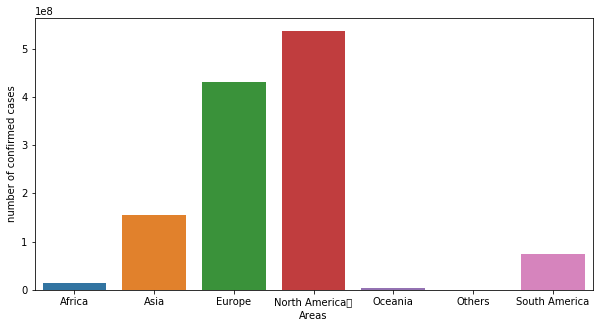

In [95]:
# 比较各大洲的确诊病例数
import matplotlib.pyplot as plt
import seaborn as sns

x = ['Africa', 'Asia', 'Europe', 'North America	', 'Oceania', 'Others', 'South America']
df_comp.province_confirmedCount[1] += 83269
y = df_comp.province_confirmedCount

# 用Seaborn画条形图
plt.figure(1,figsize=[10,5])
sns.barplot(x, y)
plt.ylabel('number of confirmed cases')
plt.xlabel('Areas')
plt.show()

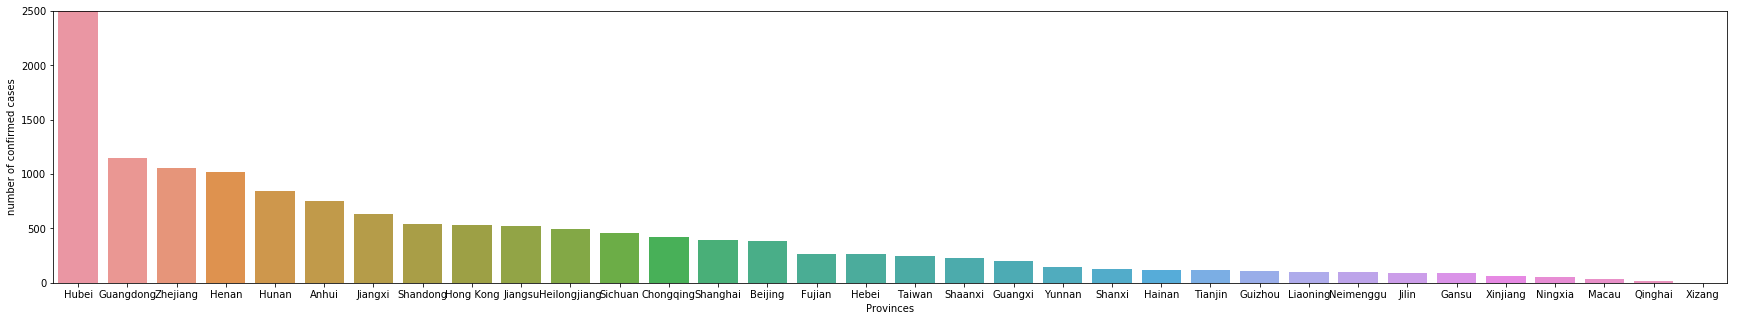

In [191]:
# 比较中国各省的确诊病例数
import numpy as np

df_china = df_china.sort_values(axis = 0, ascending = False, by='province_confirmedCount')
df_china = df_china.drop('China', axis=0)
x = list(df_china.index)
y = list(df_china.province_confirmedCount)

# 用Seaborn画条形图
plt.figure(1, figsize=[30,5])
sns.barplot(x, y)
plt.ylabel('number of confirmed cases')
plt.xlabel('Provinces')
plt.ylim(0,2500)
plt.show()

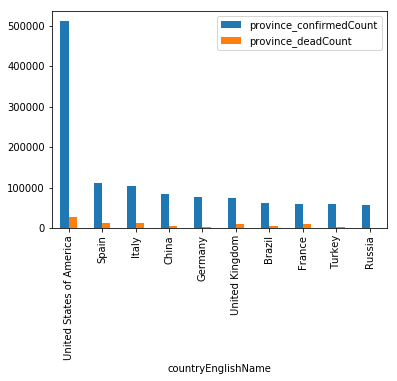

In [189]:
# 比较 Top 10 countries 的确诊数和死亡数
df_country = df.drop(['continentName','countryName','continentEnglishName','provinceName','provinceEnglishName','province_zipCode','cityName','cityEnglishName','city_zipCode','updateTime'],axis=1)
df_country = df_country.groupby(['countryEnglishName']).mean().round(0)
df_country.drop('China', axis=0)
df_country = df_country[['province_confirmedCount', 'province_deadCount']]
s = pd.Series({'province_confirmedCount': 83269, 'province_deadCount': 3865}, name = 'China')
df_country = df_country.append(s)
df_country = df_country.sort_values(axis = 0, ascending = False, by='province_confirmedCount')
df_country.head(10).plot(kind='bar')